In [465]:
import os
import json
import itertools
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [466]:
filename="\q2_train.csv"
DATA_DIR = os.path.join(os.path.abspath("../.."), "Data","quartiles")
conditionCols=['finalResult','codeModule','moduleSession']
suffix='Q2-'

In [5]:
DATA_DIR

'D:\\Thesis (Anas)\\Quartile Work\\Concat_CGAN_Quarters\\Data\\quartiles'

In [414]:
# columnsToSelect=[suffix+col if col not in conditionCols else col  for col in targetColumns]
#columnsToSelect

In [467]:
df = pd.read_csv(DATA_DIR+filename)
targetColumns=df.columns
columnsToSelect=[suffix+col if col not in conditionCols else col  for col in targetColumns]# selects the columns from data
                                                                                        #such as for Q2 all Q2 columns
    #idea is to concat synthteic Q1 columns with original Q2 columns: so we have selected original Q2 columns from data
    #with condition as final_result, code_module,code_ppt
df.head()

,finalResult,codeModule,moduleSession,ExternalQuiz,DataPlus,DualPlus,Folder,Forumng,Glossary,HomePage,...,OuElluminate,OuWiki,PageClicks,Questionnaire,Quiz,RepeatActivity,Resource,SharedSubPage,SubPage,Url
0,Pass,1,0,0.0,0.0,0.0,0,6.0,0.0,17.0,...,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0,0
1,Pass,5,0,0.0,0.0,0.0,0,14.0,0.0,60.0,...,0.0,0.0,6.0,0.0,52.0,0.0,5.0,0.0,0,0
2,Pass,6,1,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Fail,1,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,Fail,2,0,0.0,0.0,0.0,0,5.0,0.0,56.0,...,0.0,0.0,0.0,0.0,87.0,0.0,32.0,0.0,0,0


#### Contains instances of Synthetic Q1 and concatenated with instances of original Q2

In [468]:
filenameQ1="..\CGAN Q1\Q1_Synthetic.csv"

q1Synth = pd.read_csv(filenameQ1)

labels,codeValues = pd.factorize(q1Synth['codeModule'])
q1Synth.codeModule=labels
labels,moduleValues = pd.factorize(q1Synth['moduleSession'])
q1Synth.moduleSession=labels

q1Synth.head()

,finalResult,codeModule,moduleSession,ExternalQuiz,DataPlus,DualPlus,Folder,Forumng,Glossary,HomePage,...,OuElluminate,OuWiki,PageClicks,Questionnaire,Quiz,RepeatActivity,Resource,SharedSubPage,SubPage,Url
0,Pass,0,0,4.0,0.0,0.0,4.0,6.0,3.0,3.0,...,2.0,6.0,1.0,4.0,13.0,11.0,16.0,6.0,4.0,17.0
1,Pass,0,0,2.0,4.0,2.0,3.0,4.0,2.0,2.0,...,3.0,5.0,3.0,2.0,0.0,3.0,0.0,2.0,1.0,1.0
2,Pass,0,0,1.0,7.0,2.0,0.0,4.0,4.0,1.0,...,1.0,2.0,8.0,3.0,3.0,0.0,0.0,0.0,4.0,9.0
3,Pass,0,0,7.0,3.0,6.0,0.0,7.0,0.0,3.0,...,2.0,4.0,1.0,0.0,17.0,2.0,14.0,5.0,5.0,0.0
4,Pass,0,0,4.0,2.0,3.0,6.0,4.0,2.0,2.0,...,3.0,3.0,3.0,3.0,0.0,2.0,6.0,1.0,2.0,10.0


In [469]:
with open(DATA_DIR+'/meta.pkl', 'rb') as file:  # Overwrites any existing file.
    d=pickle.load(file)
codeModuleMap=d[0]
moduleSessionMap=d[1]

In [470]:
codeModuleMap
moduleSessionMap

Index(['J', 'B'], dtype='object')

In [471]:
synthData=[q1Synth]

data=pd.DataFrame()
for r in ['Pass','Fail']:
    for c in range(0,len(codeModuleMap)):
        for m in range(0,len(moduleSessionMap)):
            original=df[(df.finalResult==r) &  (df.codeModule==c) & (df.moduleSession==m)].copy().reset_index(drop=True)
            temp=original.iloc[:,0:3]
            originalF=original.iloc[:,3:]
            toSample=originalF.shape[0]
            q=1
            for synth in synthData:
                synthF=synth[(synth.finalResult==r) & (synth.codeModule==c) & (synth.moduleSession==m)].sample(toSample).copy().reset_index(drop=True)
#                 print(r,c,m,toSample,synthF.shape[0])
                synthF=synthF.iloc[:,3:]
                synthF.columns=[ 'Q'+str(q)+'-'+col for col in synthF.columns ]
                q+=1
                temp=pd.concat([temp,synthF],axis=1)
            
            
            originalF.columns=[ 'Q'+str(q)+'-'+col for col in originalF.columns]
            temp=pd.concat([temp,originalF],axis=1)
            data=pd.concat([data,temp],axis=0)
            
print(data.shape)

(17949, 43)


In [472]:
data.head()

,finalResult,codeModule,moduleSession,Q1-ExternalQuiz,Q1-DataPlus,Q1-DualPlus,Q1-Folder,Q1-Forumng,Q1-Glossary,Q1-HomePage,...,Q2-OuElluminate,Q2-OuWiki,Q2-PageClicks,Q2-Questionnaire,Q2-Quiz,Q2-RepeatActivity,Q2-Resource,Q2-SharedSubPage,Q2-SubPage,Q2-Url
0,Pass,0,0,3.0,5.0,5.0,5.0,5.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
1,Pass,0,0,3.0,10.0,5.0,14.0,5.0,11.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Pass,0,0,6.0,0.0,7.0,3.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0
3,Pass,0,0,3.0,6.0,3.0,3.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
4,Pass,0,0,3.0,8.0,4.0,6.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


In [473]:
# encode categorical columns for learning
labels,finalResultMap = pd.factorize(data['finalResult'])
data.finalResult=labels
data.head()

,finalResult,codeModule,moduleSession,Q1-ExternalQuiz,Q1-DataPlus,Q1-DualPlus,Q1-Folder,Q1-Forumng,Q1-Glossary,Q1-HomePage,...,Q2-OuElluminate,Q2-OuWiki,Q2-PageClicks,Q2-Questionnaire,Q2-Quiz,Q2-RepeatActivity,Q2-Resource,Q2-SharedSubPage,Q2-SubPage,Q2-Url
0,0,0,0,3.0,5.0,5.0,5.0,5.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
1,0,0,0,3.0,10.0,5.0,14.0,5.0,11.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,0,0,6.0,0.0,7.0,3.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0
3,0,0,0,3.0,6.0,3.0,3.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
4,0,0,0,3.0,8.0,4.0,6.0,4.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


In [160]:
finalResultMap

Index(['Pass', 'Fail'], dtype='object')

In [11]:
data.shape

(17949, 43)

In [161]:
data['Q1-ExternalQuiz'].nunique()

11

In [584]:
classes_count = 11 # 2 results + 7 codes + 2 modules  (contition vector dims)
epochs=10
input_size =data.shape[1]
input_size

43

In [175]:
data.shape[1]

43

# GAN

In [452]:
import torch, time, pickle
import torch.nn as nn
import torch.optim as optim

#### Some helperfunctions:

In [585]:
def loss_plot(hist, path = 'Train_hist.png', model_name = ''):
    x = range(len(hist['D_loss']))

    y1 = hist['D_loss']
    y2 = hist['G_loss']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')

    plt.xlabel('Iter')
    plt.ylabel('Loss')

    plt.legend(loc=4)
    plt.grid(True)
    plt.tight_layout()

    path = os.path.join(path, model_name + '_loss.png')

    plt.savefig(path)
    plt.show()
    plt.close()
    
def print_network(net):
    num_params = 0
    for param in net.parameters():
        num_params += param.numel()
    print(net)
    print('Total number of parameters: %d' % num_params)

    
def initialize_weights(net):
    for m in net.modules():
        if isinstance(m, nn.Linear):
            # using input feature size to scale random weights (best practice for ReLU AF)
            n = m.in_features
            y = np.sqrt(2.0/n)
            
            m.weight.data.normal_(0, y)
            m.bias.data.zero_()

#### Generator and Discriminator networks

In [616]:
class generator(nn.Module):
    def __init__(self, input_dim, output_dim, input_size, class_num):
        super(generator, self).__init__()
        
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.input_size = input_size
        self.class_num = class_num

        #Has 2 Linear FC layers with 23+500 an 512 neurons each and ReLU AF
        self.fc = nn.Sequential(
            nn.Linear(self.input_dim , 128),#+ self.class_num
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, output_dim),
            nn.BatchNorm1d(output_dim),
            nn.ReLU(),
        )
        initialize_weights(self)

    def forward(self, input, label):
        x = torch.cat([input, label], 1)
        #x=input.view(input.size(0), -1)
        print("x in G-forward",x.size())
        x = self.fc(x)
        print("x in G-forward after fc",x.size())
        print("")

        return x

class discriminator(nn.Module):
    def __init__(self, input_dim, output_dim, input_size, class_num):
        super(discriminator, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.input_size = input_size
        self.class_num = class_num

        #Has 2 Linear FC layers with 23+500 an 1024 neurons each and ReLU AF
        self.fc = nn.Sequential(
            nn.Linear(self.input_dim , 64),#+ class_num
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, self.output_dim),
            nn.Sigmoid(), # output is binary
        )
        initialize_weights(self)

    def forward(self, input, label):
        x = torch.cat([input, label], 1)
        #x=input.view(input.size(0), -1)
        print("x in D-forward",x.size())
        x = self.fc(x)
        print("x in D-forward after fc",x.size())
        print("")

        return x

In [ ]:
#feat=df['Q1-ExternalQuiz'].tolist()

### CGAN network

In [98]:
# class CGAN(object):
#     def __init__(self, epoch, batch_size, save_dir, result_dir, log_dir, gpu_mode, input_size, dataloader,z_dim=69,
#                 model_dir=datetime.now().strftime("%X").replace(':','.') + '_epoch-%d'%epochs,lrG=0.0002, lrD=0.0002,
#                 beta1=0.5, beta2=0.9999, class_num=classes_count):
#         # parameters
#         self.save_dir = save_dir
#         self.model_dir=model_dir
#         self.result_dir = result_dir
#         self.log_dir = log_dir
#         self.model_name = self.__class__.__name__
#         self.gpu_mode = gpu_mode
#         self.epoch = epoch
#         self.batch_size = batch_size
#         self.input_size = input_size
#         self.z_dim = z_dim  # noise for generator
#         self.class_num = class_num
#         self.sample_num = self.class_num ** 2

#         # load dataset
#         self.data_loader = dataloader # (self.dataset, self.input_size, self.batch_size)
#         data = self.data_loader.__iter__().__next__()[0]

#         # networks init
#         self.G = generator(input_dim=self.z_dim, output_dim=data.shape[1], input_size=self.input_size, class_num=self.class_num)
#         self.D = discriminator(input_dim=data.shape[1], output_dim=1, input_size=self.input_size, class_num=self.class_num)
#         self.G_optimizer = optim.Adam(self.G.parameters(), lr=lrG, betas=(beta1, beta2))
#         self.D_optimizer = optim.Adam(self.D.parameters(), lr=lrD, betas=(beta1, beta2))
        
#         print('---------- Networks architecture -------------')
#         print_network(self.D)
#         print('-----------------------------------------------')

#         if self.gpu_mode:
#             self.G.cuda()
#             self.D.cuda()
#             self.BCE_loss = nn.BCELoss().cuda()  # binary cross entropy loss
#         else:
#             self.BCE_loss = nn.BCELoss()

#         # fixed noise samples 
#         self.sample_z_ = torch.zeros((self.sample_num, self.z_dim))
#         for i in range(self.class_num):
#             self.sample_z_[i*self.class_num] = torch.rand(1, self.z_dim)
#             for j in range(1, self.class_num):
#                 self.sample_z_[i*self.class_num + j] = self.sample_z_[i*self.class_num]

#         # fixed noise conditions sample
#         temp = torch.zeros((self.class_num, 1))
#         for i in range(self.class_num):
#             temp[i, 0] = i

            
#         temp_y = torch.zeros((self.sample_num, 1))
#         for i in range(self.class_num):
#             temp_y[i*self.class_num: (i+1)*self.class_num] = temp

#         self.sample_y_ = torch.zeros((self.sample_num, self.class_num)).scatter_(1, temp_y.type(torch.LongTensor), 1)
#         if self.gpu_mode:
#             self.sample_z_, self.sample_y_ = self.sample_z_.cuda(), self.sample_y_.cuda()

#     def train(self):
#         self.train_hist = {}
#         self.train_hist['D_loss'] = []
#         self.train_hist['G_loss'] = []
#         self.train_hist['per_epoch_time'] = []
#         self.train_hist['total_time'] = []

#         self.y_real_, self.y_fake_ = torch.ones(self.batch_size, 1), torch.zeros(self.batch_size, 1)
#         if self.gpu_mode:
#             self.y_real_, self.y_fake_ = self.y_real_.cuda(), self.y_fake_.cuda()

#         self.D.train()
#         print('training start!!')
#         start_time = time.time()
#         for epoch in range(self.epoch):
#             self.G.train()
#             epoch_start_time = time.time()
#             for iter, (x_,_y1,_y2) in enumerate(self.data_loader):
#                 if iter == self.data_loader.dataset.__len__() // self.batch_size:
#                     break  # epoch complete

#                 z_ = torch.rand((self.batch_size, self.z_dim))
                
#                 #places one at specified index location to one-hot encode y
#                 y1_vec_ = y_.type(torch.FloatTensor)
#                 y2_vec_ = y_.type(torch.FloatTensor)
                
#                 y1_fill_ = y1_vec_ 
#                 y2_fill_ = y2_vec_ 
#                 if self.gpu_mode:
#                     x_, z_, y1_vec_,y2_vec_, y_fill_ = x_.cuda(), z_.cuda(), y1_vec_.cuda(),y2_vec_.cuda(),y1_fill_.cuda(),y2_fill_.cuda()

#                 # update D network
#                 D_loss=self.updateDiscriminator(z_, x_, y1_vec_,y1_vec_,y1_fill_,y2_fill_)

#                 # update G network
#                 G_loss=self.updateGenerator(z_, x_, y1_vec_,y1_vec_,y1_fill_,y2_fill_)
#                 G_loss=self.updateGenerator(z_, x_, y1_vec_,y1_vec_,y1_fill_,y2_fill_)
#                 self.train_hist['G_loss'].append(G_loss.item())
                
#                 if ((iter + 1) % 30) == 0:
#                     print("Epoch: [%2d] [%4d/%4d] D_loss: %.8f, G_loss: %.8f" %
#                           ((epoch + 1), (iter + 1), self.data_loader.dataset.__len__() // self.batch_size, D_loss.item(), G_loss.item()))
            
#             print("Epoch: [%2d] completed\t D_loss: %.8f, G_loss: %.8f" %(epoch + 1,D_loss.item(), G_loss.item()))
            
#             #view data after every 100-epochs and save it as well
#             if epoch%100==0 and epoch>0:
#                 print('Max:\t',np.max(self.generateDataBatch().iloc[:,3:].max(axis=0).values))
#                 self.save(epoch)
                
#             self.train_hist['per_epoch_time'].append(time.time() - epoch_start_time)
            
#             if epoch%500==0 and epoch>0:
#                 loss_plot(self.train_hist, os.path.join(self.save_dir, self.model_dir), self.model_name)

#         self.train_hist['total_time'].append(time.time() - start_time)
#         print("Avg one epoch time: %.2f, total %d epochs time: %.2f" % (np.mean(self.train_hist['per_epoch_time']),
#               self.epoch, self.train_hist['total_time'][0]))
#         print("Training finish!... save training results")

#         self.save(epochs)
#         loss_plot(self.train_hist, os.path.join(self.save_dir, self.model_dir), self.model_name)

#     def updateDiscriminator(self, z_, x_, y1_vec_,y1_vec_,y1_fill_,y2_fill_):
#         self.D_optimizer.zero_grad()
#         D_real = self.D(x_, y_fill_)
#         D_real_loss = self.BCE_loss(D_real, self.y1_real_,self.y2_real_)

#         G_ = self.G(z_, y1_vec_,y2_vec_)
#         D_fake = self.D(G_, y1_fill_,y2_fill_)
#         D_fake_loss = self.BCE_loss(D_fake, self.y1_fake_,self.y2_fake_)

#         D_loss = D_real_loss + D_fake_loss
#         self.train_hist['D_loss'].append(D_loss.item())

#         D_loss.backward()
#         self.D_optimizer.step()
#         return D_loss
        
#     def updateGenerator(self,z_, x_, y1_vec_,y2_vec_, y1_fill_,y2_fill_):
#         self.G_optimizer.zero_grad()
#         G_ = self.G(z_, y1_vec_,y2_vec_)
#         D_fake = self.D(G_, y1_fill_,y2_fill_)
#         G_loss = self.BCE_loss(D_fake, self.y1_real_,self.y2_real_)
#         G_loss.backward()
#         self.G_optimizer.step()
#         return G_loss
        
#     def visualize_results(self, epoch, fix=True):
#         self.G.eval()

#         if not os.path.exists(self.result_dir + '/' + '/' + self.model_name):
#             os.makedirs(self.result_dir + '/' + '/' + self.model_name)

#         if fix:
#             """ fixed noise """
#             samples = self.G(self.sample_z_, self.sample_y1_,self.sample_y2_)
#         else:
#             """ random noise """
#             sample_y1_ = torch.zeros(self.batch_size, self.class_num).scatter_(1, torch.randint(0, self.class_num - 1, (self.batch_size, 1)).type(torch.LongTensor), 1)
#             sample_y2_ = torch.zeros(self.batch_size, self.class_num).scatter_(1, torch.randint(0, self.class_num - 1, (self.batch_size, 1)).type(torch.LongTensor), 1)
#             sample_z_ = torch.rand((self.batch_size, self.z_dim))
#             if self.gpu_mode:
#                 sample_z_, sample_y1_,sample_y2_ = sample_z_.cuda(), sample_y1_.cuda(),sample_y2_.cuda()

#             samples = self.G(sample_z_, sample_y1_,sample_y2_)

#         samples = (samples + 1) / 2
        
#         if self.gpu_mode:
#             samples = samples.cpu().data.numpy()
#         else:
#             samples = samples.data.numpy()

#         np.savetxt(self.result_dir+'/epoch-%d.txt'%epoch, samples, delimiter=',')
        
#     def generateDataBatch(self,classLabel=None,classCode=None,classModule=None):
#         # here we have to generate condition vector (y) manually to generate synthetic data
#         # for using Q1 as condition I guess we can directly use that here, but will require some adjustments
        
#         if classLabel is not None:
#             randomResults=torch.randint(classLabel,classLabel+1, (self.batch_size, 1))
#         else:
#             randomResults=torch.randint(0, 2, (self.batch_size, 1))
        
#         if classCode is not None:
#             randomCodes=torch.randint(classCode, classCode+1, (self.batch_size, 1))
#         else:
#             randomCodes=torch.randint(0, 7, (self.batch_size, 1))
            
#         if classModule is not None:
#             randomModules=torch.randint(classModule, classModule+1, (self.batch_size, 1))
#         else:
#             randomModules=torch.randint(0, 2, (self.batch_size, 1))
        
#         condition_vecs=torch.cat([ randomResults,randomCodes,randomModules],1)
#         t_vecs=[_torch_one_hot(t_c).unsqueeze(0) for t_c in condition_vecs]
#         sample_y_ = torch.cat(t_vecs,0).type(torch.FloatTensor)
        
#         sample_z_ = torch.rand((self.batch_size, self.z_dim))
#         if self.gpu_mode: 
#             sample_z_, sample_y1_,sample_y2_ = sample_z_.cuda(), sample_y1_.cuda(),sample_y2_.cuda()
#             samples = self.G(sample_z_, sample_y1_,sample_y2_)

#         samples = (samples + 1) / 2


#         if self.gpu_mode:
#             samples = samples.cpu().data.numpy()
#             sample_y1_= sample_y1_.cpu().data.numpy()
#             sample_y2_= sample_y2_.cpu().data.numpy()
#         else:
#             samples = samples.data.numpy()
#             sample_y1_= sample_y1_.data.numpy()
#             sample_y2_= sample_y2_.data.numpy()

#         samples=samples.round()
#         g=print("type of samples: ",type(samples))
#         print(g)

#         # map one-hot conditions to appropriate discrete column labels
#         finalResult=np.argmax(sample_y1_[:,:2],1)
#         codeModule=np.argmax(sample_y1_[:,2:9],1)
#         moduleSession=np.argmax(sample_y1_[:,9:],1)
        
#         synthData=np.c_[finalResult,codeModule,moduleSession,samples]

#         synthDataDf=pd.DataFrame(synthData,columns=data.columns)
#         k=print("helloooo...!!",synthDataDf)
#         print(k)

#         # replace numeric labels with string values
#         synthDataDf.finalResult = list(finalResultMap[i] for i in np.argmax(sample_y_,axis=1))
#         synthDataDf.moduleSession = synthDataDf.apply(
#             lambda x:'%s' % moduleSessionMap[x['moduleSession'] 
#                                              if x['moduleSession']>=0 and x['moduleSession']<len(moduleSessionMap) 
#                                              else (
#                                                  0 if x['moduleSession']>0 else len(moduleSessionMap)-1
#                                              ) ],
#             axis=1
#         )
#         synthDataDf.codeModule = synthDataDf.apply(
#             lambda x:'%s' % codeModuleMap[x['codeModule'] 
#                                              if x['codeModule']>=0 and x['codeModule']<len(codeModuleMap) 
#                                              else (
#                                                  0 if x['codeModule']>0 else len(codeModuleMap)-1
#                                              ) ],
#             axis=1
#         )

#         return g
#         return synthDataDf
    
#     def generateData(self,batches=1,classLabel=None,code=None,module=None):
#         usePassed=False
#         if classLabel is not None:
#             usePassed=True
#             try:
#                 if type(classLabel)== str:
#                     print('string')
#                     classLabel=list(finalResultMap).index(classLabel)
#                 elif classLabel<0 or classLabel>len(finalResultMap)-1:
#                     classLabel=1  #default generate for Fail class
#             except:
#                 classLabel=1  #default generate for Fail class
        
#         df=pd.DataFrame(columns=data.columns)
        
#         # to generate same proportion of synthetic data for each class
        
#         # important in this appraoch because I am concatenating based on same condition of original 
#         # data to keep as much similarity as possible
        
#         conditions=[]
#         #total 28 conditions (2*7*2)
#         for r in range(0,2):
#             for c in range(0,len(codeModuleMap)):
#                 for m in range(0,len(moduleSessionMap)):
#                     conditions.append((r,c,m))
        
#         # sequentially generate batch for each class condition
#         for b in range(batches):
#             if usePassed:
#                 r=classLabel
#             else:
#                 r=conditions[b%28][0]
            
#             c= code if code else conditions[b%28][1]
#             m= module if module else conditions[b%28][2]
            
#             df=pd.concat([df,self.generateDataBatch(classLabel= r,classCode=c,classModule=m),df.iloc[:,3:23]])
#             f=print("df rows and columns...",df.iloc[0:2,:])
#             print(f)
#         return f
#         return df
        
#     def save(self,e):
#         save_dir = os.path.join(self.save_dir, self.model_dir)

#         if not os.path.exists(save_dir):
#             os.makedirs(save_dir)

#         torch.save(self.G.state_dict(), os.path.join(save_dir, self.model_name + '_G_epoch-%d.pkl'%e))
#         torch.save(self.D.state_dict(), os.path.join(save_dir, self.model_name + '_D_epoch-%d.pkl'%e))

#         with open(os.path.join(save_dir, self.model_name + '_history_epoch-%d.pkl'%e), 'wb') as f:
#             pickle.dump(self.train_hist, f)

#     def load(self,e):
#         save_dir = os.path.join(self.save_dir, self.model_dir)

#         self.G.load_state_dict(torch.load(os.path.join(save_dir, self.model_name + '_G_epoch-%d.pkl'%e)))
#         self.D.load_state_dict(torch.load(os.path.join(save_dir, self.model_name + '_D_epoch-%d.pkl'%e)))
#         print(os.path.join(save_dir, self.model_name + '_history_epoch-%d.pkl'%e))
#         with open(os.path.join(save_dir, self.model_name + '_history_epoch-%d.pkl'%e),'rb') as input_file:
#             self.train_hist=pickle.load(input_file)

SyntaxError: duplicate argument 'y1_vec_' in function definition (<ipython-input-98-5f885d941bc6>, line 128)

In [370]:
data.iloc[0:2,9:11]
# x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# x[:3]

,Q1-HomePage,Q1-HtmlActivity
0,1.0,2.0
1,0.0,0.0


In [617]:
class CGAN(object):
    def __init__(self, epoch, batch_size, save_dir, result_dir, log_dir, gpu_mode, input_size, dataloader,z_dim=65,
                model_dir=datetime.now().strftime("%X").replace(':','.') + '_epoch-%d'%epochs,lrG=0.0002, lrD=0.0002,
                beta1=0.5, beta2=0.9999, class_num=classes_count):
        # parameters
        self.save_dir = save_dir
        self.model_dir=model_dir
        self.result_dir = result_dir
        self.log_dir = log_dir
        self.model_name = self.__class__.__name__
        self.gpu_mode = gpu_mode
        self.epoch = epoch
        self.batch_size = batch_size
        self.input_size = input_size
        self.z_dim = z_dim  # noise for generator
        self.class_num = class_num
        self.sample_num = self.class_num ** 2

        # load dataset
        self.data_loader = dataloader # (self.dataset, self.input_size, self.batch_size)
        data = self.data_loader.__iter__().__next__()[0]

        # networks init output_dim=data.shape[1]
        self.G = generator(input_dim=self.z_dim, output_dim=data.shape[1], input_size=self.input_size, class_num=self.class_num)
        self.D = discriminator(input_dim=data.shape[1], output_dim=1, input_size=self.input_size, class_num=self.class_num)
        self.G_optimizer = optim.Adam(self.G.parameters(), lr=lrG, betas=(beta1, beta2))
        self.D_optimizer = optim.Adam(self.D.parameters(), lr=lrD, betas=(beta1, beta2))
        
        print('---------- Networks architecture -------------')
        print("discriminator n/w")
        print_network(self.D)
        print("generator n/w")
        print_network(self.G)
        print('-----------------------------------------------')

        if self.gpu_mode:
            self.G.cuda()
            self.D.cuda()
            self.BCE_loss = nn.BCELoss().cuda()  # binary cross entropy loss
        else:
            self.BCE_loss = nn.BCELoss()

        # fixed noise samples 
        self.sample_z_ = torch.zeros((self.sample_num, self.z_dim))
        for i in range(self.class_num):
            self.sample_z_[i*self.class_num] = torch.rand(1, self.z_dim)
            for j in range(1, self.class_num):
                self.sample_z_[i*self.class_num + j] = self.sample_z_[i*self.class_num]

        # fixed noise conditions sample
        temp = torch.zeros((self.class_num, 1))
        for i in range(self.class_num):
            temp[i, 0] = i

            
        temp_y = torch.zeros((self.sample_num, 1))
        print("temp_y",temp_y.size())
        #print("temp_y",temp_y)
        for i in range(self.class_num):
            temp_y[i*self.class_num: (i+1)*self.class_num] = temp

        self.sample_y_ = torch.zeros((self.sample_num, self.class_num)).scatter_(1, temp_y.type(torch.LongTensor), 1)
        if self.gpu_mode:
            self.sample_z_, self.sample_y_ = self.sample_z_.cuda(), self.sample_y_.cuda()

    def train(self):
        self.train_hist = {}
        self.train_hist['D_loss'] = []
        self.train_hist['G_loss'] = []
        self.train_hist['per_epoch_time'] = []
        self.train_hist['total_time'] = []

        self.y_real_, self.y_fake_ = torch.ones(self.batch_size, 1), torch.zeros(self.batch_size, 1)
        if self.gpu_mode:
            self.y_real_, self.y_fake_ = self.y_real_.cuda(), self.y_fake_.cuda()

        self.D.train()
        print('training start!!')
        start_time = time.time()
        for epoch in range(self.epoch):
            self.G.train()
            epoch_start_time = time.time()
            for iter, (x_, y_) in enumerate(self.data_loader):
                if iter == self.data_loader.dataset.__len__() // self.batch_size:
                    break  # epoch complete

                z_ = torch.rand((self.batch_size, self.z_dim))
                #expected Tensor as element 1 in argument 0, but got numpy.ndarray
                #places one at specified index location to one-hot encode y
#                 y_vec1_=y_[:3]
#                 y_vec2_=y_[3:]
#                 #torch.from_numpy(np.array(y_vec1_))
#                 y_vec1_ = y_.type(torch.FloatTensor)
#                 torch.from_numpy(np.array(y_vec2_))
               
#                 y_vec_=np.concatenate((y_vec1_,y_vec2_))
#                 #torch.from_numpy(y_vec_)
#                 torch.from_numpy(np.array(y_vec_))
                #places one at specified index location to one-hot encode y

                y_vec_ = y_.type(torch.FloatTensor)
                y_fill_ = y_vec_ 
                print("first y_vec",y_vec_)
                print("first y_vec_",y_vec_.size())#512x31
                
#                 torch.from_numpy(self.y_vec_)
#                 torch.from_numpy(self.y_fill_)
                if self.gpu_mode:
                    x_, z_, y_vec_, y_fill_ = x_.cuda(), z_.cuda(), y_vec_.cuda(), y_fill_.cuda()

                # update D network
                print("first x_",type(x_)) #tensor
                print("first x_",x_.size())# 512x20
                D_loss=self.updateDiscriminator(z_, x_, y_vec_, y_fill_)
#                 print("after Dupdate: x_",type(x_)) #tensor
#                 print("after Dupdate: x_",x_.size())# 512x20
#                 print("after Dupdate: y_vec_",y_vec_.size())
                

                # update G network
                G_loss=self.updateGenerator(z_, x_, y_vec_, y_fill_)
                G_loss=self.updateGenerator(z_, x_, y_vec_, y_fill_)
#                 print("after G update: x_type",type(x_)) #tensor
#                 print("after G update: x_size",x_.size())# 512x20
#                 print("after G update: y_vec_size",y_vec_.size())
                
                self.train_hist['G_loss'].append(G_loss.item())
                
                if ((iter + 1) % 30) == 0:
                    print("Epoch: [%2d] [%4d/%4d] D_loss: %.8f, G_loss: %.8f" %
                          ((epoch + 1), (iter + 1), self.data_loader.dataset.__len__() // self.batch_size, D_loss.item(), G_loss.item()))
            
            print("Epoch: [%2d] completed\t D_loss: %.8f, G_loss: %.8f" %(epoch + 1,D_loss.item(), G_loss.item()))
            
            #view data after every 100-epochs and save it as well
            if epoch%100==0 and epoch>0:
                print('Max:\t',np.max(self.generateDataBatch().iloc[:,23:].max(axis=0).values))
                self.save(epoch)
                
            self.train_hist['per_epoch_time'].append(time.time() - epoch_start_time)
            
            if epoch%500==0 and epoch>0:
                loss_plot(self.train_hist, os.path.join(self.save_dir, self.model_dir), self.model_name)

        self.train_hist['total_time'].append(time.time() - start_time)
        print("Avg one epoch time: %.2f, total %d epochs time: %.2f" % (np.mean(self.train_hist['per_epoch_time']),
              self.epoch, self.train_hist['total_time'][0]))
        print("Training finish!... save training results")

        self.save(epochs)
        loss_plot(self.train_hist, os.path.join(self.save_dir, self.model_dir), self.model_name)

    def updateDiscriminator(self, z_, x_, y_vec_, y_fill_):
        self.D_optimizer.zero_grad()
        D_real = self.D(x_, y_fill_) 
        D_real_loss = self.BCE_loss(D_real, self.y_real_)

        G_ = self.G(z_, y_vec_)
        D_fake = self.D(G_, y_fill_)
        D_fake_loss = self.BCE_loss(D_fake, self.y_fake_)

        D_loss = D_real_loss + D_fake_loss
        self.train_hist['D_loss'].append(D_loss.item())

        D_loss.backward()
        self.D_optimizer.step()
        return D_loss
        
    def updateGenerator(self,z_, x_, y_vec_, y_fill_):
        self.G_optimizer.zero_grad()
        G_ = self.G(z_, y_vec_)
        D_fake = self.D(G_, y_fill_)
        G_loss = self.BCE_loss(D_fake, self.y_real_)
        G_loss.backward()
        self.G_optimizer.step()
        return G_loss
        
    def visualize_results(self, epoch, fix=True):
        self.G.eval()

        if not os.path.exists(self.result_dir + '/' + '/' + self.model_name):
            os.makedirs(self.result_dir + '/' + '/' + self.model_name)

        if fix:
            """ fixed noise """
            samples = self.G(self.sample_z_, self.sample_y_)
        else:
            """ random noise """
            sample_y_ = torch.zeros(self.batch_size, self.class_num).scatter_(1, torch.randint(0, self.class_num - 1, (self.batch_size, 1)).type(torch.LongTensor), 1)
            sample_z_ = torch.rand((self.batch_size, self.z_dim))
            if self.gpu_mode:
                sample_z_, sample_y_ = sample_z_.cuda(), sample_y_.cuda()

            samples = self.G(sample_z_, sample_y_)

        samples = (samples + 1) / 2
        
        if self.gpu_mode:
            samples = samples.cpu().data.numpy()
        else:
            samples = samples.data.numpy()

        np.savetxt(self.result_dir+'/epoch-%d.txt'%epoch, samples, delimiter=',')
        
    def generateDataBatch(self,classLabel=None,classCode=None,classModule=None):
        # here we have to generate condition vector (y) manually to generate synthetic data
        # for using Q1 as condition I guess we can directly use that here, but will require some adjustments
        
        if classLabel is not None:
            randomResults=torch.randint(classLabel,classLabel+1, (self.batch_size, 1))
        else:
            randomResults=torch.randint(0, 2, (self.batch_size, 1))
        
        if classCode is not None:
            randomCodes=torch.randint(classCode, classCode+1, (self.batch_size, 1))
        else:
            randomCodes=torch.randint(0, 7, (self.batch_size, 1))
            
        if classModule is not None:
            randomModules=torch.randint(classModule, classModule+1, (self.batch_size, 1))
        else:
            randomModules=torch.randint(0, 2, (self.batch_size, 1))
        
        condition_vecs=torch.cat([ randomResults,randomCodes,randomModules],1)
        t_vecs=[_torch_one_hot(t_c).unsqueeze(0) for t_c in condition_vecs]
        sample_y_ = torch.cat(t_vecs,0).type(torch.FloatTensor)#sample y contains the one hot encoded vectors but u want to concat
                                                            #sample y with other 20 columns as well so how to handle this?
        
        sample_z_ = torch.rand((self.batch_size, self.z_dim))
        if self.gpu_mode: 
            sample_z_, sample_y_ = sample_z_.cuda(), sample_y_.cuda()
            samples = self.G(sample_z_, sample_y_)

        samples = (samples + 1) / 2


        if self.gpu_mode:
            samples = samples.cpu().data.numpy()
            sample_y_= sample_y_.cpu().data.numpy()
        else:
            samples = samples.data.numpy()
            sample_y_= sample_y_.data.numpy()

        samples=samples.round()
        #print("type of samples: ",type(samples))

        # map one-hot conditions to appropriate discrete column labels
        finalResult=np.argmax(sample_y_[:,:2],1)
        codeModule=np.argmax(sample_y_[:,2:9],1)
        moduleSession=np.argmax(sample_y_[:,9:11],1)
        
        synthData=np.c_[finalResult,codeModule,moduleSession,samples]

        synthDataDf=pd.DataFrame(synthData,columns=data.columns)

        # replace numeric labels with string values
        synthDataDf.finalResult = list(finalResultMap[i] for i in np.argmax(sample_y_,axis=1))
        synthDataDf.moduleSession = synthDataDf.apply(
            lambda x:'%s' % moduleSessionMap[x['moduleSession'] 
                                             if x['moduleSession']>=0 and x['moduleSession']<len(moduleSessionMap) 
                                             else (
                                                 0 if x['moduleSession']>0 else len(moduleSessionMap)-1
                                             ) ],
            axis=1
        )
        synthDataDf.codeModule = synthDataDf.apply(
            lambda x:'%s' % codeModuleMap[x['codeModule'] 
                                             if x['codeModule']>=0 and x['codeModule']<len(codeModuleMap) 
                                             else (
                                                 0 if x['codeModule']>0 else len(codeModuleMap)-1
                                             ) ],
            axis=1
        )

        return synthDataDf
    
    
    def generateData(self,batches=1,classLabel=None,code=None,module=None):
        usePassed=False
        if classLabel is not None:
            usePassed=True
            try:
                if type(classLabel)== str:
                    print('string')
                    classLabel=list(finalResultMap).index(classLabel)
                elif classLabel<0 or classLabel>len(finalResultMap)-1:
                    classLabel=1  #default generate for Fail class
            except:
                classLabel=1  #default generate for Fail class
        
        df=pd.DataFrame(columns=data.columns)
        
        # to generate same proportion of synthetic data for each class
        
        # important in this appraoch because I am concatenating based on same condition of original 
        # data to keep as much similarity as possible
        
        conditions=[]
        #total 28 conditions (2*7*2)
        for r in range(0,2):
            for c in range(0,len(codeModuleMap)):
                for m in range(0,len(moduleSessionMap)):
                    conditions.append((r,c,m))
        
        # sequentially generate batch for each class condition
        for b in range(batches):
            if usePassed:
                r=classLabel
            else:
                r=conditions[b%28][0]
            
            c= code if code else conditions[b%28][1]
            m= module if module else conditions[b%28][2]
            
            df=pd.concat([df,self.generateDataBatch(classLabel= r,classCode=c,classModule=m)])#df.iloc[:,3:23]
            check=print("check the columns....",df.columns)
        return df,check
        
    def save(self,e):
        save_dir = os.path.join(self.save_dir, self.model_dir)

        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        torch.save(self.G.state_dict(), os.path.join(save_dir, self.model_name + '_G_epoch-%d.pkl'%e))
        torch.save(self.D.state_dict(), os.path.join(save_dir, self.model_name + '_D_epoch-%d.pkl'%e))

        with open(os.path.join(save_dir, self.model_name + '_history_epoch-%d.pkl'%e), 'wb') as f:
            pickle.dump(self.train_hist, f)

    def load(self,e):
        save_dir = os.path.join(self.save_dir, self.model_dir)

        self.G.load_state_dict(torch.load(os.path.join(save_dir, self.model_name + '_G_epoch-%d.pkl'%e)))
        self.D.load_state_dict(torch.load(os.path.join(save_dir, self.model_name + '_D_epoch-%d.pkl'%e)))
        print(os.path.join(save_dir, self.model_name + '_history_epoch-%d.pkl'%e))
        with open(os.path.join(save_dir, self.model_name + '_history_epoch-%d.pkl'%e),'rb') as input_file:
            self.train_hist=pickle.load(input_file)

In [416]:
#data.iloc[2:3,4:23]
df=data.copy()
df.shape
#data.shape
#feat1_dict = { 'Ozzy': 3, 'Filou': 8, 'Luna': 5

(17949, 43)

In [80]:
#df.iloc[2:3,4:23]
#df.drop(['B', 'C'], axis=1)
# cols = df.iloc[:,4:23]
# cols
cols=df.columns[4:23].values.tolist()
#cols

#df=df.drop(df.columns[cols],axis=1,inplace=True)

In [77]:
df=df.drop(cols,1,inplace=True)
df

In [116]:
df=df.drop(list(df)[4:23], axis=1)


In [105]:
a=df['Q1-ExternalQuiz'].tolist()

In [170]:
data.iloc[:2,3:23]

,Q1-ExternalQuiz,Q1-DataPlus,Q1-DualPlus,Q1-Folder,Q1-Forumng,Q1-Glossary,Q1-HomePage,Q1-HtmlActivity,Q1-OuCollaborate,Q1-OuContent,Q1-OuElluminate,Q1-OuWiki,Q1-PageClicks,Q1-Questionnaire,Q1-Quiz,Q1-RepeatActivity,Q1-Resource,Q1-SharedSubPage,Q1-SubPage,Q1-Url
0,5.0,3.0,5.0,12.0,2.0,2.0,1.0,8.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0,32.0,3.0,2.0,20.0
1,6.0,7.0,4.0,5.0,5.0,6.0,0.0,5.0,17.0,0.0,2.0,3.0,5.0,3.0,1.0,0.0,25.0,3.0,0.0,3.0


### Write PyTorch custom DataLoader
I am using Bin number as condition for CGAN and other features as input.

In theory, it will now learn distribution of students belonging to each bin and as student in each bin has same theoratical behavior so we can generate data for those students

In [554]:
# helper functions to one hot encode multiple vectors ub different multi-dimensions

# if I pass it [[1,4,0],[0,2,1]] it will return [[0,1,0,0,0,0,1,0,0,1,0],[1,0,0,0,1,0,0,0,0,0,1]]
# length of one-hot vector will be sum of all vec_dims e.g: 2+7+2=11

def _torch_one_hot(y, n_dims=[2,7,2], dtype=torch.LongTensor):
    scatter_dim = len(y.size())
    y_tensor = y.type(torch.LongTensor).view(*y.size(), -1)
    zeros = torch.zeros(*y.size(), sum(n_dims)).type(dtype)
    
    full_one_hot=zeros.scatter(scatter_dim, y_tensor, 1)
    
    vectors=[]
    for (n,d) in enumerate(n_dims):
        vectors.append(full_one_hot[n,:d])
    
    # to combine into batch
    # v1=_to_one_hot(yS[0])
    # v2=_to_one_hot(yS[1])
    # torch.cat((v1.unsqueeze(0),v2.unsqueeze(0)),0)
    return torch.cat(vectors,-1)

def np_one_hot(y, n_dims=[2,7,2]):
    b = np.zeros((y.size, sum(n_dims)),dtype=int)
    b[np.arange(y.size),y] = 1
    
    vectors=[]
    for (n,d) in enumerate(n_dims):
        vectors.append(b[n,:d])
    
    return np.concatenate(vectors,-1)

In [88]:
#data.iloc[0:1,3:23]

In [135]:
# from torch.utils.data import Dataset, DataLoader

# class CustomDataset(Dataset):
#     def __init__(self, df, transform=None, target_transform=None):
#         self.transform = transform
#         self.target_transform = target_transform

#         y1_columns =['finalResult','codeModule','moduleSession']#,'Q1-ExternalQuiz']
#         y2_columns= list(data.iloc[:,3:23])
#         x_columns = list(data.iloc[:,23:])#list(set(df.columns) - set(y_columns))
        
#         self.x = df[x_columns]
#         self.y1 = df[y1_columns]
#         self.y2 = df[y2_columns]

#     def __len__(self):
#         return self.x.shape[0]

#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()[0]
    
#         x = self.x.iloc[idx].values
#         y1 = self.y1.iloc[idx].values
#         y2 = self.y2.iloc[idx].values
        
#         x = torch.from_numpy(x).type(torch.FloatTensor)
        
#         if self.transform:
#             x = self.transform(x)
            
#         if self.target_transform:
#             y1 = self.target_transform(y1)
#             y2 = self.target_transform(y2)
#         y=np.concatenate((np_one_hot(y1),y2))
#         #y=np.concatenate((first, second),
        
#         return x,y

In [563]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.transform = transform
        self.target_transform = target_transform

        # features for using in condition
        #y2_columns= list(data.iloc[:,3:23])
#       x_columns = list(data.iloc[:,23:])

        y_columns = list(data.iloc[:,:3]) #['finalResult','codeModule','moduleSession']     
        
        x_columns = list(data.iloc[:,23:])#list(set(df.columns) - set(y_columns))
        
        self.x = df[x_columns]
        self.y = df[y_columns]

    def __len__(self):
#         print("y cols:",self.y.shape[1])
#         print("x cols:",self.x.shape[1])
        return self.x.shape[0]
        #return self.data_len

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()[0]
    
        x = self.x.iloc[idx].values
        y = self.y.iloc[idx].values
        #df=self.df.iloc[idx].values
        
        x = torch.from_numpy(x).type(torch.FloatTensor)
        
#         y1=self.y.iloc[:,:3]
#         y2=self.y.iloc[:,3:]
        
#         y1=np_one_hot(y1)
#         print("hheelooooo",y1)
            
#         y1=torch.LongTensor(y1)
#         y2=torch.LongTensor(y2)
            
#         y=torch.cat((y1, y2), 0)
        
        if self.transform:
            x = self.transform(x)
            
        if self.target_transform:
#             
            y = self.target_transform(y)
        y=np_one_hot(y)
#         print("length after encode: ",len(y))
        y=np.append(y,(df.iloc[idx,3:12].values))
        y=y.astype('int64')
#         print(".....",y.dtype.type)
        return x,y      


In [618]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.transform = transform
        self.target_transform = target_transform

        # features for using in condition
        #y2_columns= list(data.iloc[:,3:23])
#       x_columns = list(data.iloc[:,23:])

        y_columns = ['finalResult','codeModule','moduleSession'] #list(data.iloc[:,:23])     
        
        x_columns = list(set(df.columns) - set(y_columns))#list(data.iloc[:,23:])
        
        self.x = df[x_columns]
        self.y = df[y_columns]

    def __len__(self):
#         print("y cols:",self.y.shape[1])
#         print("x cols:",self.x.shape[1])
        return self.x.shape[0]
        #return self.data_len

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()[0]
    
        x = self.x.iloc[idx].values
        y = self.y.iloc[idx].values
        
        x = torch.from_numpy(x).type(torch.FloatTensor)
        
        if self.transform:
            x = self.transform(x)
            
        if self.target_transform:
            
#             y1=y.iloc[:,:3]
#             y1=np_one_hot(y1)
#             y=np.concatenate((y,y1))
            y = self.target_transform(y)
            #np.asarray(self.data.iloc[:, 0])
            #ch=print("y cols:",self.y.shape[1])
        
    
            
       
        # one hot encode codition vector (might be possible to train without t)
        #return g
        return x,np_one_hot(y)

In [619]:
batch_size = 512

d = CustomDataset(data)
data_loader = DataLoader(d, batch_size=batch_size, shuffle=True)

In [620]:
for (id,(_x,_y)) in enumerate(data_loader):
    print(_x)
    print(_y.size())
    break

tensor([[ 3.,  0., 20.,  ...,  0.,  1.,  3.],
        [ 2.,  0.,  7.,  ...,  0.,  0.,  7.],
        [ 5.,  0.,  3.,  ...,  0.,  0.,  3.],
        ...,
        [ 6.,  0.,  7.,  ...,  0.,  0.,  3.],
        [ 6.,  0.,  4.,  ...,  0.,  0.,  3.],
        [ 3.,  0.,  0.,  ...,  0.,  0.,  5.]])
torch.Size([512, 11])


In [481]:
def loadAndPlotModel(e,m_dir='02.54.07_epoch-2000'):
    model = CGAN(
        epoch=e,
        batch_size=batch_size,
        save_dir='models',
        result_dir='results',
        log_dir='logs',
        gpu_mode=False,
        input_size=input_size,
        dataloader=data_loader,
        z_dim=z_dim,
        lrG=lrG,
        model_dir=m_dir,
        lrD=lrD,
        beta1=beta1,
        beta2=beta2
    )
    model.load(e)
    loss_plot(model.train_hist, os.path.join(model.save_dir, model.model_dir), model.model_name)
    
    return model

In [621]:
epoch = epochs
z_dim = 51
beta1 = 0.5
beta2 = 0.9
lrG = 0.00018
lrD = 0.00004

cgan = CGAN(
    epoch=epoch,
    batch_size=batch_size,
    save_dir='models',
    result_dir='results',
    log_dir='logs',
    gpu_mode=False,
    input_size=input_size,
    dataloader=data_loader,
    z_dim=z_dim,
    lrG=lrG,
    lrD=lrD,
    beta1=beta1,
    beta2=beta2
)

---------- Networks architecture -------------
discriminator n/w
discriminator(
  (fc): Sequential(
    (0): Linear(in_features=40, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Linear(in_features=64, out_features=1, bias=True)
    (4): Sigmoid()
  )
)
Total number of parameters: 2817
generator n/w
generator(
  (fc): Sequential(
    (0): Linear(in_features=51, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Linear(in_features=128, out_features=40, bias=True)
    (4): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
)
Total number of parameters: 12152
-----------------------------------------------
temp_y torch.Size([121, 1])


training start!!
first y_vec tensor([[0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 1., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 1., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  .

first y_vec tensor([[0., 1., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 1., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[0., 1., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[1., 0., 1.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[1., 0., 0.,  ..., 1., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 1., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 1., 1., 0.],
        [1., 0., 1.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 1., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 1., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 1., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[0., 1., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 1., 0., 1.],


first y_vec tensor([[1., 0., 0.,  ..., 1., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 1., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 1., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

Epoch: [ 3] [  30/  35] D_loss: 1.45281172, G_loss: 

first y_vec tensor([[0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 1., 1., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 1., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 1., 1., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 1., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[0., 1., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[0., 1., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[0., 1., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 1.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 1., 1., 0.],
        ...,
        [0., 1., 0.,  ..., 1., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 1.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[0., 1., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[0., 1., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 1., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[0., 1., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[0., 1., 0.,  ..., 1., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[0., 1., 0.,  ..., 1., 1., 0.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[0., 1., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[0., 1., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[0., 1., 0.,  ..., 1., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 1., 1., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 1.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[1., 0., 0.,  ..., 1., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[0., 1., 0.,  ..., 1., 1., 0.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 1., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

Epoch: [ 8] completed	 D_loss: 1.45547056, G_loss: 0

first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 1., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[1., 0., 0.,  ..., 1., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 1., 1., 0.],


first y_vec tensor([[0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[0., 1., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[0., 1., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 1.],
        ...,
        [1., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[0., 1., 0.,  ..., 1., 0., 1.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 1., 1., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 1., 0.],
        [1., 0., 1.,  ..., 0., 1., 0.]])
first y_vec_ torch.Size([512, 11])
first x_ <class 'torch.Tensor'>
first x_ torch.Size([512, 40])
x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

x in G-forward torch.Size([512, 62])
x in G-forward after fc torch.Size([512, 40])

x in D-forward torch.Size([512, 51])
x in D-forward after fc torch.Size([512, 1])

first y_vec tensor([[1., 0., 0.,  ..., 0., 1., 0.],


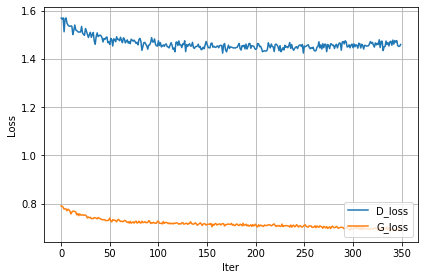

In [592]:
cgan.train()

---------- Networks architecture -------------
discriminator(
  (fc): Sequential(
    (0): Linear(in_features=51, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Linear(in_features=64, out_features=1, bias=True)
    (4): Sigmoid()
  )
)
Total number of parameters: 3521
generator n/w
generator(
  (fc): Sequential(
    (0): Linear(in_features=62, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): Linear(in_features=128, out_features=40, bias=True)
    (4): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
)
Total number of parameters: 13560
-----------------------------------------------
temp_y torch.Size([121, 1])
models\11.43.04_epoch-10\CGAN_history_epoch-10.pkl


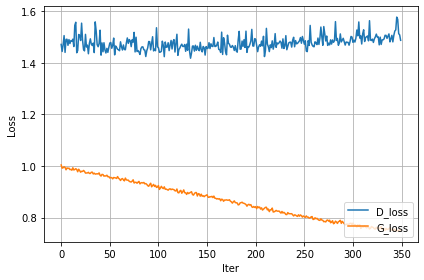

In [604]:
cgan=loadAndPlotModel(epochs,'11.43.04_epoch-10')

In [605]:
cgan.generateDataBatch().head()

UnboundLocalError: local variable 'samples' referenced before assignment

In [25]:
cgan.generateDataBatch().max(axis=0)

finalResult          Pass
codeModule            GGG
moduleSession           J
Q1-ExternalQuiz         5
Q1-DataPlus             6
Q1-DualPlus             9
Q1-Folder               6
Q1-Forumng             10
Q1-Glossary             6
Q1-HomePage             0
Q1-HtmlActivity         7
Q1-OuCollaborate       56
Q1-OuContent            7
Q1-OuElluminate         4
Q1-OuWiki               8
Q1-PageClicks          48
Q1-Questionnaire        6
Q1-Quiz                71
Q1-RepeatActivity       5
Q1-Resource             5
Q1-SharedSubPage        4
Q1-SubPage              8
Q1-Url                  6
Q2-ExternalQuiz         7
Q2-DataPlus            10
Q2-DualPlus            38
Q2-Folder               9
Q2-Forumng             10
Q2-Glossary             5
Q2-HomePage            21
Q2-HtmlActivity        10
Q2-OuCollaborate       35
Q2-OuContent            4
Q2-OuElluminate         8
Q2-OuWiki               4
Q2-PageClicks           5
Q2-Questionnaire       10
Q2-Quiz                 6
Q2-RepeatAct

In [26]:
data.max(axis=0)

finalResult             1.0
codeModule              6.0
moduleSession           1.0
Q1-ExternalQuiz        11.0
Q1-DataPlus            18.0
Q1-DualPlus            13.0
Q1-Folder              23.0
Q1-Forumng             12.0
Q1-Glossary            16.0
Q1-HomePage             8.0
Q1-HtmlActivity        16.0
Q1-OuCollaborate       33.0
Q1-OuContent           12.0
Q1-OuElluminate        10.0
Q1-OuWiki              14.0
Q1-PageClicks          12.0
Q1-Questionnaire       11.0
Q1-Quiz                51.0
Q1-RepeatActivity      62.0
Q1-Resource            54.0
Q1-SharedSubPage       16.0
Q1-SubPage             10.0
Q1-Url                 44.0
Q2-ExternalQuiz        25.0
Q2-DataPlus            25.0
Q2-DualPlus            79.0
Q2-Folder               0.0
Q2-Forumng           4054.0
Q2-Glossary           803.0
Q2-HomePage          2233.0
Q2-HtmlActivity         6.0
Q2-OuCollaborate       79.0
Q2-OuContent         5209.0
Q2-OuElluminate        76.0
Q2-OuWiki             671.0
Q2-PageClicks       

In [ ]:
synthData=cgan.generateData(batches=280)
synthData=synthData.loc[:,columnsToSelect]
synthData.columns=targetColumns
synthData.to_csv("./Q2_synthetic.csv", columns=synthData.columns,index=False)

UnboundLocalError: local variable 'samples' referenced before assignment

In [ ]:
synthData['finalResult'].value_counts()

In [ ]:
synthData['moduleSession'].value_counts()

In [ ]:
synthData['codeModule'].value_counts()